# Big Ideas Final
## Introduction
For our project, we compared the neighborhoods based on how green they are - both colorfully and ecologically. We chose this because, as we were searching through the WPRDC we were interested in the parks dataset. So, to build on that interest, we decided to do the greenest neighborhood and searched through the datasets to find ones that relate. 

## Our Metric
In order to determine what the greenest neighborhood we looked at the nieghborhoods' nature (colorfully green) as well as their air quality (eco green). Then, we combined the nature aspect and the eco aspect to get an overall "Green Score" to find a winner. 

We used four datasets:

1. Allegheny County Air Quality (Britney) - https://data.wprdc.org/dataset/allegheny-county-air-quality
2. City of Pittsburgh Parks (Mia) - https://data.wprdc.org/dataset/parks
3. More Parks (Mia) - https://data.wprdc.org/dataset/parks1
4. City of Pittsburgh Trees (Mia) - https://data.wprdc.org/dataset/city-trees


## Finding the Best Neighborhood

first, let's import the necessities

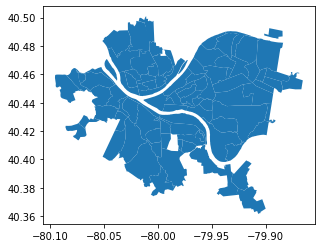

In [81]:
import pandas as pd
import seaborn as sns
import re
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

now, we can import our datasets

In [20]:
cparks = pd.read_csv("cityparks.csv")
pparks = pd.read_csv("pittparks.csv")
trees_data = pd.read_csv("trees.csv")
airquality = pd.read_csv("airquality.csv")

### metric 1 - parks!
let's figure out which neighborhood has the most total sqft of parks       
first, we will merge our two intial datasets

In [11]:
## merge the csvs by park name
parks = pd.merge(cparks, pparks, left_on="name", right_on = "updatepknm")
parks = parks[["neighborhood", "sqft"]]

## make sure it worked
parks.head(10)

,neighborhood,sqft
0,Beechview,7.228826e+04
1,Crawford-Roberts,1.662005e+04
2,North Shore,2.506040e+04
3,Allegheny Center,2.673959e+06
4,North Shore,9.955954e+04
5,Central Business District,6.743627e+04
6,Central Northside,7.653375e+03
7,Beechview,1.754189e+05
8,East Liberty,4.497676e+03
9,Bedford Dwellings,3.520345e+05


now, let's group the neighborhoods and find the total sqft in each neighborhood

In [13]:
# create database with total sqft to map it
num_feet = parks.groupby("neighborhood").sum()['sqft']
num_feet.sort_values(ascending=False)

neighborhood
Squirrel Hill South    4.542749e+07
Highland Park          1.668423e+07
Perry North            1.133439e+07
Brookline              4.779746e+06
Beltzhoover            3.491360e+06
                           ...     
Homewood West          1.866649e+04
North Oakland          1.126342e+04
Esplen                 5.775499e+03
Bluff                  4.716919e+03
West Oakland           2.336813e+03
Name: sqft, Length: 72, dtype: float64

this dataframe shows that squirrel hill south has the most parks, but let's use a map to see how the others compare

In [14]:
# merge databases
parks_map = neighborhoods.merge(num_feet, how='left', left_on='hood', right_on='neighborhood')

# make sure it merged correctly
parks_map[['hood','sqft','geometry']].head()

,hood,sqft,geometry
0,Central Oakland,80327.390261,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,11263.421139,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2336.812919,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,81089.622308,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,362323.431602,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


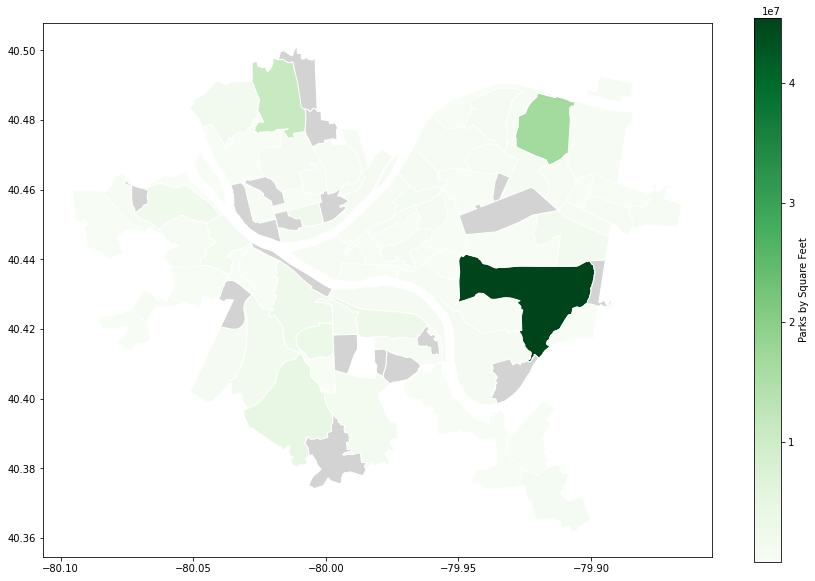

In [15]:
# draw the map!
parks_map.plot(column='sqft', 
               cmap='Greens',              
               edgecolor="white",       
               legend=True,              
               legend_kwds={'label': "Parks by Square Feet"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

 as you can see, **squirrel hill south** clearly has the most park space by sqft

### metric 2 - trees

now, let's find out which neighborhood is the leafiest with the trees dataset

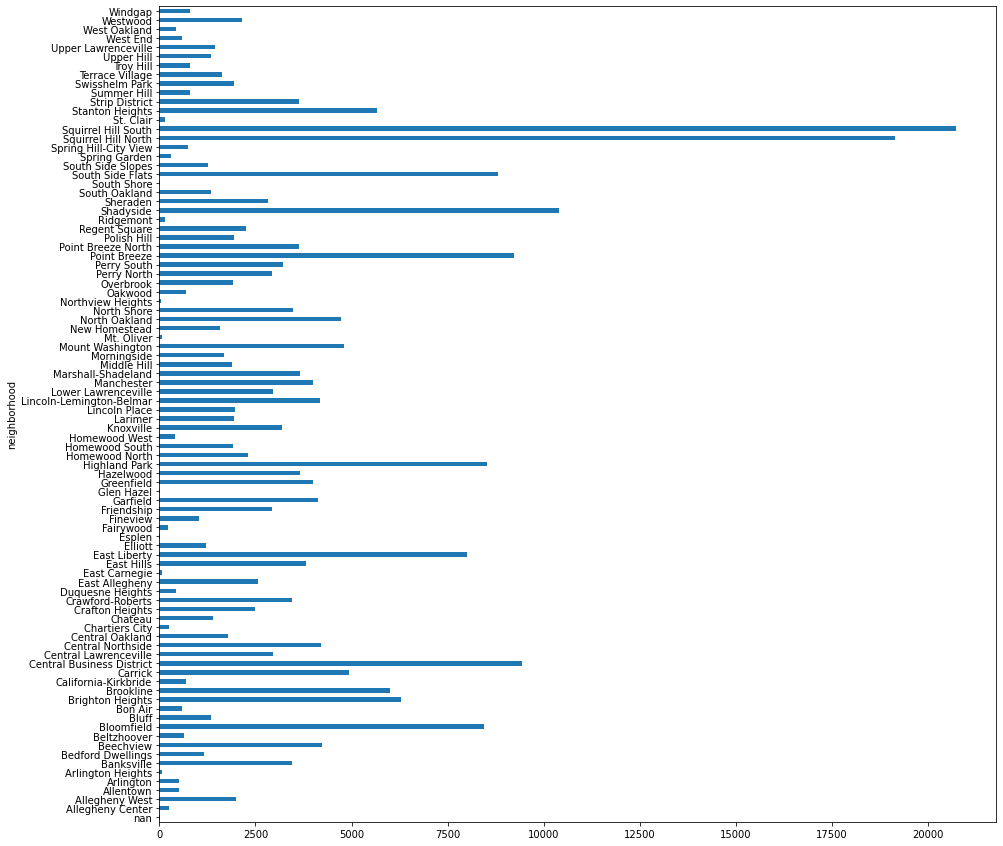

In [16]:
## remove values that are stumps (these do not add to the greenery of a neighborhood)
trees = trees_data.query("common_name != 'Stump'")
## also make sure all the trees recorded have a width to be compared
trees = trees.query("width > 0")
trees = trees[["neighborhood","width"]]

trees_graph = trees.pivot(columns = "neighborhood", values = "width")

## then plot the data in a bar graph to visualize it
trees_graph.sum().plot.barh(figsize = (15,15))

let's map it again.     
first, we're going to change the database so it's comparing the canopies of the trees (or the leafiness/greeness).     
on average, the trunk to canopy ratio is 1:18, so we'll multiply this database by 18 to get the canopy for each tree

In [17]:
canopy = trees.groupby("neighborhood").sum()*18
print(canopy) ## print it to make sure it's correct

                       width
neighborhood                
Allegheny Center      4572.0
Allegheny West       35910.0
Allentown             9306.0
Arlington             9342.0
Arlington Heights     1026.0
...                      ...
Upper Lawrenceville  25938.0
West End             10710.0
West Oakland          7884.0
Westwood             38502.0
Windgap              14238.0

[89 rows x 1 columns]


now, we can merge it to create the map

In [18]:
# do the merge
trees_map = neighborhoods.merge(canopy, how='left', left_on='hood', right_on='neighborhood')

# make sure it's correct
trees_map[['hood','width','geometry']].head(10)

,hood,width,geometry
0,Central Oakland,32364.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,84852.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,7884.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,62046.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,65430.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,169776.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,13230.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,58122.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,14454.0,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,810.0,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


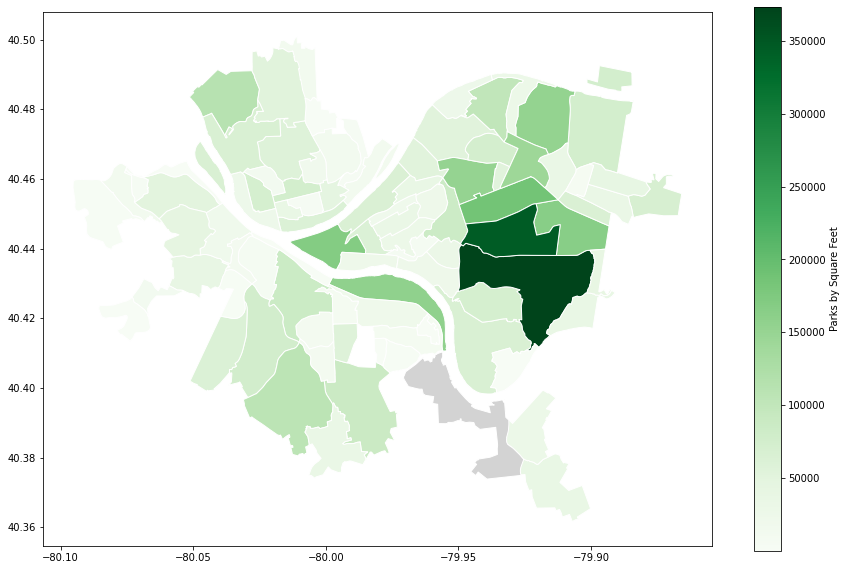

In [19]:
# draw the map
trees_map.plot(column='width', 
               cmap='Greens',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Parks by Square Feet"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

this, again, clearly shows that **squirrel hill south** has the most greenery by trees

### metric 3 - air quality

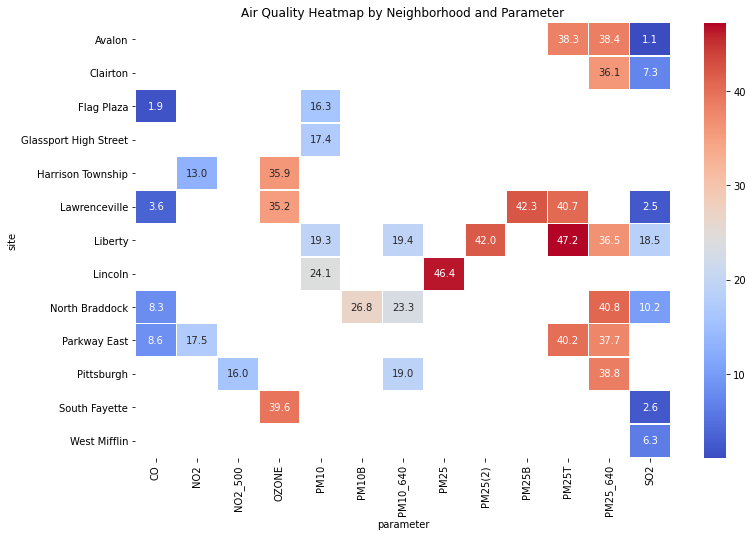

In [23]:
# Combine 'Lawrenceville' and 'Lawrenceville2' into 'Lawrenceville'
airquality.loc[airquality['site'].str.contains('Lawrenceville'), 'site'] = 'Lawrenceville'

# Combine 'Liberty' and 'Liberty2' into 'Liberty'
airquality.loc[airquality['site'].str.contains('Liberty'), 'site'] = 'Liberty'

# Pivot the dataframe to get 'site' as rows, 'parameter' as columns, and 'index_value' as values
heatmap_data = airquality.pivot_table(index='site', columns='parameter', values='index_value', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Air Quality Heatmap by Neighborhood and Parameter')
plt.show()

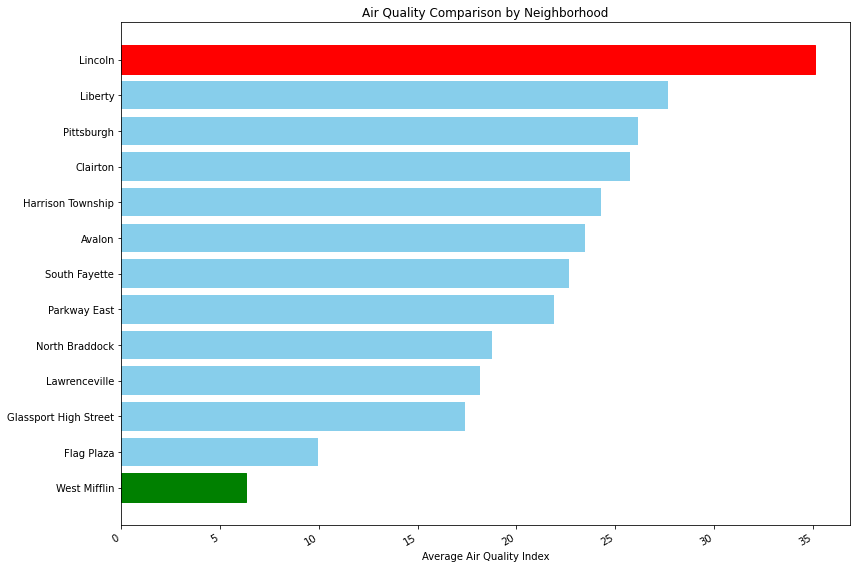

In [25]:
# Combine 'Lawrenceville' and 'Lawrenceville2' into 'Lawrenceville'
airquality.loc[airquality['site'].str.contains('Lawrenceville'), 'site'] = 'Lawrenceville'

# Combine 'Liberty' and 'Liberty2' into 'Liberty'
airquality.loc[airquality['site'].str.contains('Liberty'), 'site'] = 'Liberty'

# Create a new column 'neighborhood' with complete site names
airquality['neighborhood'] = airquality['site']

# Group by 'neighborhood' and calculate the mean of 'index_value' for each neighborhood
grouped_data = airquality.groupby('neighborhood')['index_value'].mean().reset_index()

# Sort the data by 'index_value' for better visualization
grouped_data = grouped_data.sort_values(by='index_value', ascending=True)

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot a horizontal bar chart
bars = plt.barh(range(len(grouped_data)), grouped_data['index_value'], color='skyblue')

# Highlight the best and worst neighborhoods
best_neighborhood = grouped_data['neighborhood'].iloc[0]
worst_neighborhood = grouped_data['neighborhood'].iloc[-1]

# Customize the y-axis ticks and labels
plt.yticks(range(len(grouped_data)), grouped_data['neighborhood'])

# Ensure that the complete neighborhood names are displayed
plt.gcf().autofmt_xdate()

# Iterate through the bars to set colors
for i, (bar, neighborhood) in enumerate(zip(bars, grouped_data['neighborhood'])):
    if neighborhood == best_neighborhood:
        bar.set_color('green')
    elif neighborhood == worst_neighborhood:
        bar.set_color('red')

plt.xlabel('Average Air Quality Index')
plt.title('Air Quality Comparison by Neighborhood')
plt.tight_layout()
plt.show()

Based on only the air quality index value submetric, I have come to the conclusion that the most eco friendly neighborhood is West Mifflin because it has the lowest average air quality index value(approximately 6.5). The neighborhood with the highest air quality index value is Lincoln, which has an average of approximately 35. 

## find the green score
first, let's combine the trees and parks to get the greenest neighborhood nature-wise.     
we'll start by merging the two datasets

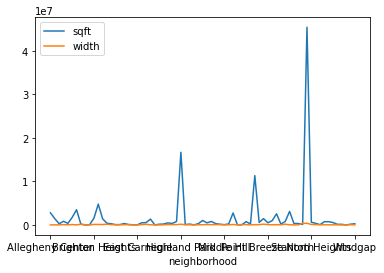

In [26]:
greenery = pd.merge(num_feet, canopy, left_on = "neighborhood", right_on = "neighborhood") # merge the data!
greenery.plot() # plot it to see how they compare

the data from the parks database clearly overpowers the trees data, but i believe the data is equally important.     
so, lets divide the sqft data by 100 to make the values more similar

In [29]:
sqft = num_feet/100
sqft.head(10) # make sure it worked

neighborhood
Allegheny Center     27839.572257
Allentown            14339.683051
Arlington             2529.968877
Banksville            8368.559578
Bedford Dwellings     3520.344908
Beechview            17276.124578
Beltzhoover          34913.599164
Bloomfield            1635.014168
Bluff                   47.169189
Bon Air                339.535608
Name: sqft, dtype: float64

now lets add the edited sqft data to the trees data

In [38]:
greenery = pd.merge(sqft, canopy, left_on = "neighborhood", right_on = "neighborhood")
total = []
# add all the data to a list
for row, index in greenery.iterrows():
    greens = index["width"] + index["sqft"]
    total.append(greens) 

In [39]:
# add the list as a column in the greenery dataframe
greenery["total"] = total

# drop the sqft and width
greenery = greenery.drop(columns=['sqft', 'width'])

now that we've combined the data, let's sort it to see which neighborhoods are the greenest

In [44]:
greenery.sort_values("total", ascending=False) 

,total
neighborhood,
Squirrel Hill South,827468.948981
Squirrel Hill North,345265.702421
Highland Park,320148.255001
Point Breeze,180572.829252
Central Business District,173575.099968
...,...
West Oakland,7907.368129
Homewood West,7332.664870
Fairywood,5688.498127


Squirrel Hill South is the greenest neighborhood (by trees & parks), and Squirrel Hill North is the second-most green

### combine the two aspects
let's print the two datasets first to see what we're working with

In [45]:
print(greenery)
print(grouped_data)

                            total
neighborhood                     
Allegheny Center     32411.572257
Allentown            23645.683051
Arlington            11871.968877
Banksville           70378.559578
Bedford Dwellings    24580.344908
...                           ...
Upper Lawrenceville  27245.732610
West End             11994.940496
West Oakland          7907.368129
Westwood             40080.941210
Windgap              16916.258605

[71 rows x 1 columns]
             neighborhood  index_value
12           West Mifflin     6.335548
2              Flag Plaza     9.949275
3   Glassport High Street    17.414531
5           Lawrenceville    18.138481
8          North Braddock    18.741152
9            Parkway East    21.899275
11          South Fayette    22.684232
0                  Avalon    23.464221
4       Harrison Township    24.288941
1                Clairton    25.732824
10             Pittsburgh    26.133024
6                 Liberty    27.697880
7                 Lincoln   

to get the green-score, we're going to divide the greenery by the air quality index value.      

as we can see, though, the air quality data does not have specific information for each neighborhood. however, it does have an overarching "pittsburgh."      
so, for any neighborhoods that don't have an air quality index, we will use the pittsburgh data

In [124]:
# make a new list for updated neighborhood names
new_hood = []
# if the neighborhood contains one of the air quality ones, we change it to the air quality one. otherwise, we change it to pittsburgh
for row, index in greenery.iterrows():
    if re.search('Lawrenceville', row):
        hood = "Lawrenceville"
    elif re.search("Liberty", row):
        hood = "Liberty"
    elif re.search("Lincoln", row):
        hood = "Lincoln"
    else:
        hood = "Pittsburgh"
    new_hood.append(hood)

    
# add the new hoods to the greenery dataframe
greenery["new_hood"] = new_hood

In [129]:
greenscore = greenery.merge(grouped_data, how='left', left_on='new_hood', right_on='neighborhood')
# print to make sure it merged
greenscore.head(10)

,total,new_hood,neighborhood_x,old_hood,neighborhood_y,index_value
0,32411.572257,Pittsburgh,Allegheny Center,Allegheny Center,Pittsburgh,26.133024
1,23645.683051,Pittsburgh,Allentown,Allentown,Pittsburgh,26.133024
2,11871.968877,Pittsburgh,Arlington,Arlington,Pittsburgh,26.133024
3,70378.559578,Pittsburgh,Banksville,Banksville,Pittsburgh,26.133024
4,24580.344908,Pittsburgh,Bedford Dwellings,Bedford Dwellings,Pittsburgh,26.133024
5,93398.124578,Pittsburgh,Beechview,Beechview,Pittsburgh,26.133024
6,46487.599164,Pittsburgh,Beltzhoover,Beltzhoover,Pittsburgh,26.133024
7,153627.014168,Pittsburgh,Bloomfield,Bloomfield,Pittsburgh,26.133024
8,24059.169189,Pittsburgh,Bluff,Bluff,Pittsburgh,26.133024
9,10815.535608,Pittsburgh,Bon Air,Bon Air,Pittsburgh,26.133024


now, lets divide and find the green score

In [148]:
score = []

for row, index in greenscore.iterrows():
    gscore = index["total"]/index["index_value"] #divide it
    score.append(gscore) #create a new column with score
    
greenscore["score"] = score #add score to database
greenscore.sort_values("score", ascending = False)

,total,new_hood,neighborhood_x,old_hood,neighborhood_y,index_value,score
59,827468.948981,Pittsburgh,Squirrel Hill South,Squirrel Hill South,Pittsburgh,26.133024,31663.727465
58,345265.702421,Pittsburgh,Squirrel Hill North,Squirrel Hill North,Pittsburgh,26.133024,13211.854194
30,320148.255001,Pittsburgh,Highland Park,Highland Park,Pittsburgh,26.133024,12250.716002
49,180572.829252,Pittsburgh,Point Breeze,Point Breeze,Pittsburgh,26.133024,6909.756384
13,173575.099968,Pittsburgh,Central Business District,Central Business District,Pittsburgh,26.133024,6641.982961
...,...,...,...,...,...,...,...
68,7907.368129,Pittsburgh,West Oakland,West Oakland,Pittsburgh,26.133024,302.581444
33,7332.664870,Pittsburgh,Homewood West,Homewood West,Pittsburgh,26.133024,280.589987
25,5688.498127,Pittsburgh,Fairywood,Fairywood,Pittsburgh,26.133024,217.674699
20,1644.855365,Pittsburgh,East Carnegie,East Carnegie,Pittsburgh,26.133024,62.941639


when we print the database we see that squirrel hill south has the highest score, now let's plot it and visualize how the others compare

In [149]:
# do the merge
final_map = neighborhoods.merge(greenscore, how='left', left_on='hood', right_on='neighborhood_x')

# make sure it's correct
final_map[['hood','score','geometry']].head(10)

,hood,score,geometry
0,Central Oakland,1269.170913,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,3251.236225,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,302.581444,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2405.266849,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2642.374429,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,6641.982961,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,632.519787,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,2439.541845,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,NaN,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


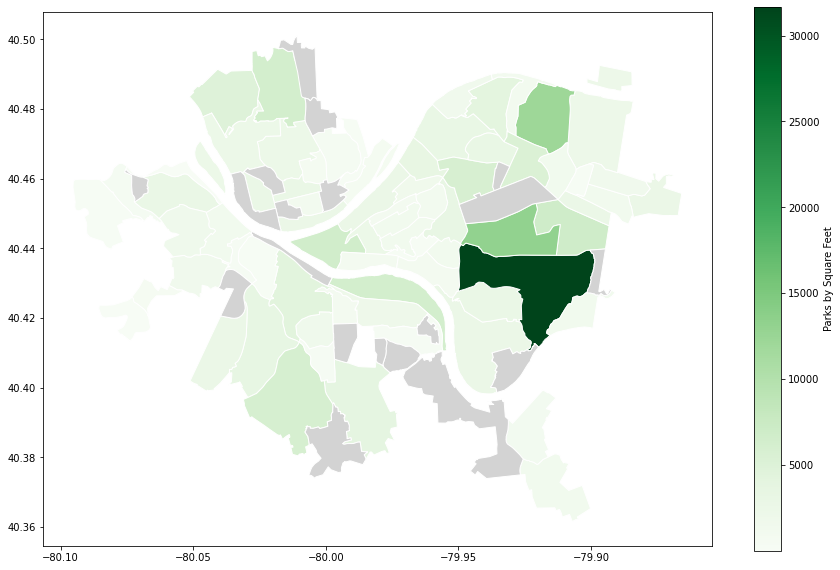

In [150]:
# draw the map
final_map.plot(column='score', 
               cmap='Greens',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Parks by Square Feet"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

### winner winner!!
Squirrel Hill South is clearly the greenest neighborhood and Squirrel Hill North is the second greenest. Therefore, Squirrel Hill (as a whole) is the best/greenest neighborhood in Pittsburgh!

#### conclusion
mia - I am not surprised that Squirrel Hill is the greenest neighborhood in Pittsburgh. I am always impressed by the beauty and amount of trees when I walk through or drive past Squirrel Hill. I haven't had much time to explore many other neighborhoods, though. 